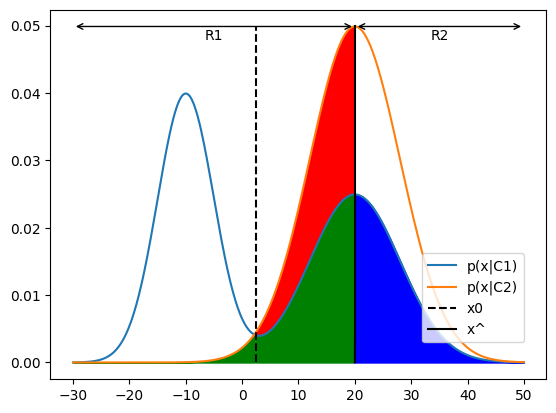

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plot_xlimin = -30
plot_xlimax = 50
x = np.linspace(plot_xlimin, plot_xlimax, 500)

mu1 = -10
sigma1 = 5

mu2 = 20
sigma2 = 8

pdf_norm1 = (norm.pdf(x, mu1, sigma1) + norm.pdf(x, mu2, sigma2)) / 2
pdf_norm2 = norm.pdf(x, mu2, sigma2)

mu_min = min(mu1, mu2)
mu_max = max(mu1, mu2)
x_dif = np.linspace(mu_min, mu_max, 500)

pdf_dif = np.abs((norm.pdf(x_dif, mu1, sigma1) + norm.pdf(x_dif, mu2, sigma2)) / 2 - norm.pdf(x_dif, mu2, sigma2))

idx_cross = np.argmin(pdf_dif)

x_line = x[idx_cross]
arrow_pos = max(max(pdf_norm1), max(pdf_norm2))
y_line = np.linspace(0, arrow_pos, 2)

plt.plot(x, pdf_norm1, label="p(x|C1)")
plt.plot(x, pdf_norm2, label="p(x|C2)")
plt.plot([x_line, x_line], y_line, linestyle="--", color="black", label="x0")
plt.plot([mu_max, mu_max], y_line, linestyle="-", color="black", label="x^")

plt.fill_between(x, pdf_norm1, pdf_norm2, where=(np.abs(pdf_norm1 - pdf_norm2) > 0)  & (x >= x[idx_cross]) & (x<=mu_max), interpolate=True, color="red")
plt.fill_between(x, 0, pdf_norm1, where = (x >= x[idx_cross]) & (x<=mu_max), interpolate=True, color="green")
plt.fill_between(x, 0, pdf_norm1, where = (x > mu_max), interpolate=True, color="blue")
plt.fill_between(x, pdf_norm2, where = (x < x[idx_cross]), interpolate=True, color="green")

plt.annotate('', xy=(mu_max, arrow_pos), xytext=(plot_xlimin, arrow_pos),
             arrowprops=dict(arrowstyle='<->', color='black'))
plt.annotate('', xy=(mu_max,arrow_pos), xytext=(plot_xlimax, arrow_pos),
             arrowprops=dict(arrowstyle='<->', color='black'))
plt.text((mu_max + plot_xlimin) / 2, arrow_pos-0.002, 'R1', ha='center')
plt.text((mu_max + plot_xlimax) / 2, arrow_pos-0.002, 'R2', ha='center')


plt.legend(loc = (0.75, 0.1) )
plt.show()
